In [1]:
from google.colab import files 
  
uploaded = files.upload()

Saving heart.csv to heart (2).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

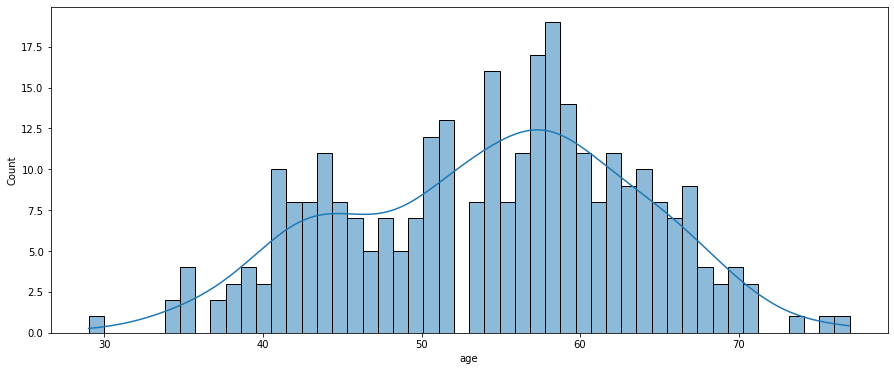

In [5]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data['age'],kde=True,bins=50)

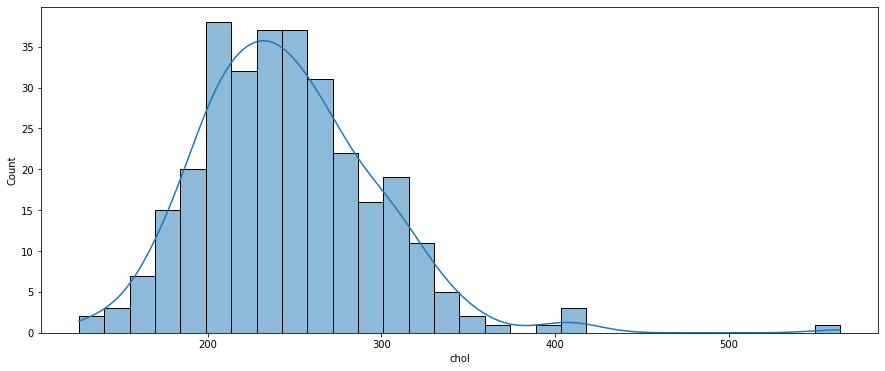

In [6]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.histplot(data['chol'],kde=True,bins=30)

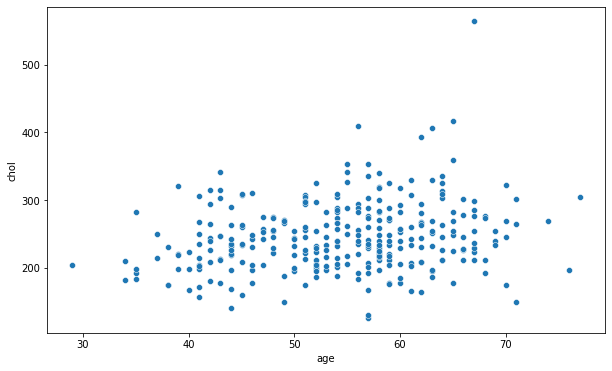

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='age',y='chol',data=data,palette = 'deep')

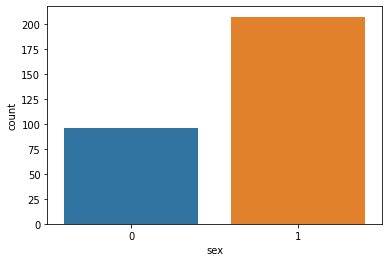

In [8]:
sns.countplot(x='sex',data=data)

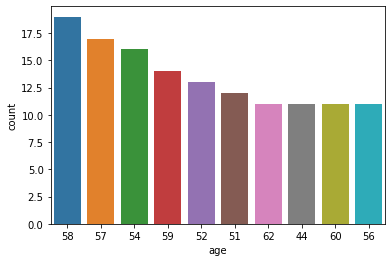

In [9]:
sns.countplot(x="age", data=data, order=data.age.value_counts().iloc[:10].index)

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = data.drop(columns=['target'])
scaler.fit(X)
X = scaler.transform(X)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

y = data['target']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)


In [12]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 7)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(accuracy)

0.819672131147541


In [13]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(X_train,y_train)

predictions = model.predict (X_test) #the input values for testing

score = accuracy_score (y_test, predictions) #the 2 arguments: 1st the expected values, 2nd the actual(the ones that were generated) values
score

0.7540983606557377

In [14]:
from sklearn import svm

clf = svm.SVC(kernel = "linear", C=2)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.8032786885245902


In [15]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 10 decision trees
clf.fit(X_train, y_train)  #Training our model
y_pred=clf.predict(X_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7213114754098361


In [39]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier

dt = tree.DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_leaf_nodes = 5, min_samples_leaf = 4, max_depth = 5)
dt.fit(X_train, y_train)   #fitting our model
y_pred=dt.predict(X_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.819672131147541


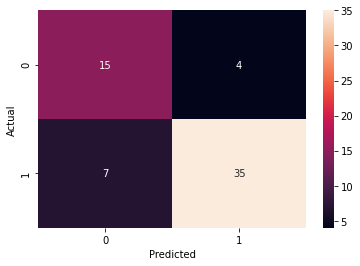

In [28]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.90      0.83      0.86        42

    accuracy                           0.82        61
   macro avg       0.79      0.81      0.80        61
weighted avg       0.83      0.82      0.82        61



In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8114035087719298

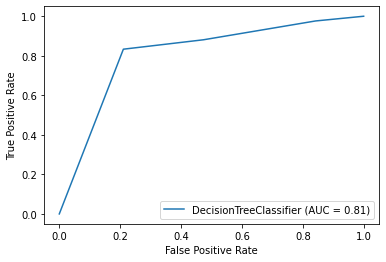

In [32]:

from sklearn.metrics import plot_roc_curve

plot_roc_curve(dt ,X_test, y_test)

based on confusion matrix, sensitivity and specificity are calculated to evaluate the calssifier based on threshold. instead of calculating several confusion matrices, ROC graph provide simple way to summarize all info.

Y axis show TP rate == Sensitivity (TP/TP+FN) tells the proportion of samples that were correctly classified

X axis show FP rate, which is 1- Specificity (FP/FP+TN) tells the porportion of samples that were incorrectly classified

ROC graph summarizes all of the confusion matrices that each threshold produced, without having to sort through the confusion matrices, we can tell which threshold is better to choose the optimal one.

AUC as it increases the better the categorization model is